# Part II The binomial tree: option valuation

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from binomial_tree import BinomialTree

In [3]:
# Run cell to increase font sizes. Usefull when saving plots
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.rcParams["figure.figsize"] = (8,6)

### Excercise 2a

In [4]:
binomial_tree = BinomialTree(S=100, vol=0.2, T=1, N=50, r=0.06, K=99, pricing_type="eu")
binomial_tree.build_stock_tree()
binomial_tree.build_option_tree()

print(f"The answer to question 2a is: {binomial_tree.option_tree[0][0]}")

The answer to question 2a is: 11.546434850755071


### Excercise 2b 
Comparing the binomial tree against the analytical Black-Scholes value of the option

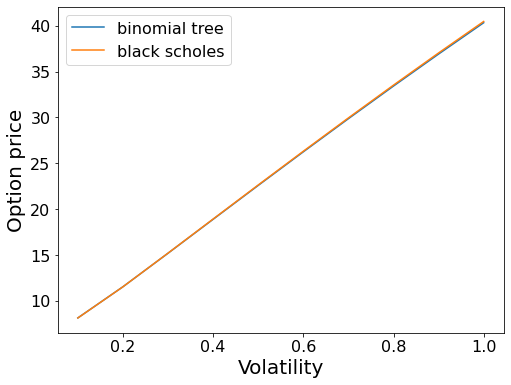

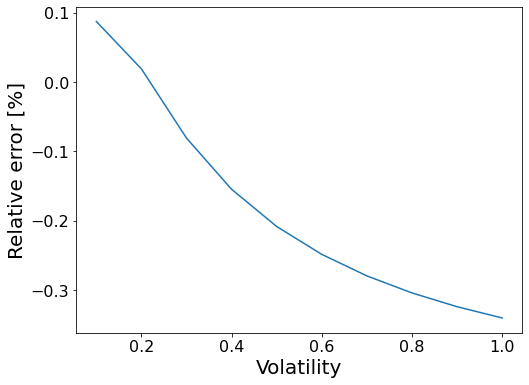

In [5]:
sigmas = np.arange(0.1, 1.1, .1)
binomial_tree_values = []
black_scholes_values = []
relative_errors = []

for sigma in sigmas:
    binomial_tree = BinomialTree(S=100, vol=sigma, T=1, N=50, r=0.06, K=99, pricing_type="eu")

    binomial_tree.build_stock_tree()
    binomial_tree.build_option_tree()

    binomial_tree_option = binomial_tree.option_tree[0][0]
    black_scholes_option, black_scholes_delta = binomial_tree.black_scholes_formula()

    relative_error = (binomial_tree_option - black_scholes_option) / black_scholes_option * 100

    binomial_tree_values.append(binomial_tree_option)
    black_scholes_values.append(black_scholes_option)
    relative_errors.append(relative_error)

plt.plot(sigmas, binomial_tree_values, label="binomial tree")
plt.plot(sigmas, black_scholes_values, label="black scholes")
plt.xlabel("Volatility")
plt.ylabel("Option price")
plt.legend()
plt.show()

plt.plot(sigmas, relative_errors)
plt.xlabel("Volatility")
plt.ylabel("Relative error [%]")
plt.show()

### Excercise 2c
Convergence of the option value as N increases

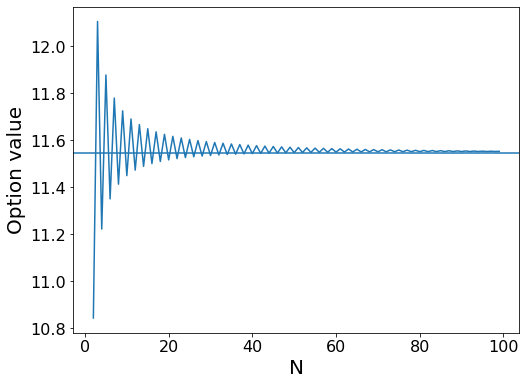

In [10]:
Ns = np.arange(2, 100, 1, dtype=int)
option_values = []
black_scholes_option = None

for N in Ns:
    binomial_tree = BinomialTree(S=100, vol=0.2, T=1, N=N, r=0.06, K=99, pricing_type="eu")

    binomial_tree.build_stock_tree()
    binomial_tree.build_option_tree()

    binomial_tree_option = binomial_tree.option_tree[0][0]
    option_values.append(binomial_tree_option)

    if black_scholes_option is None:
        black_scholes_option, black_scholes_delta = binomial_tree.black_scholes_formula()

plt.plot(Ns, option_values)
plt.axhline(black_scholes_option)
plt.xlabel("N")
plt.ylabel("Option value")
plt.show()

### Excercise 2d
Comparing hedge parameter $\Delta$ from the binomial tree at t=0 with the analytical Black-Scholes delta $\Delta$ = N(d1)

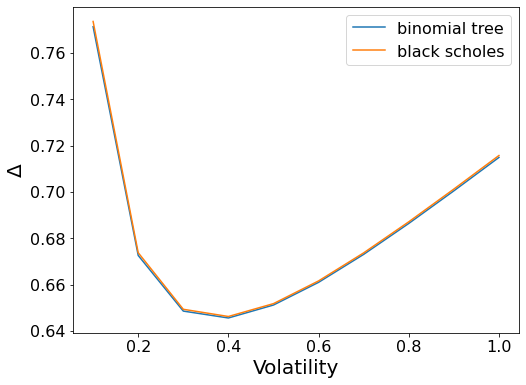

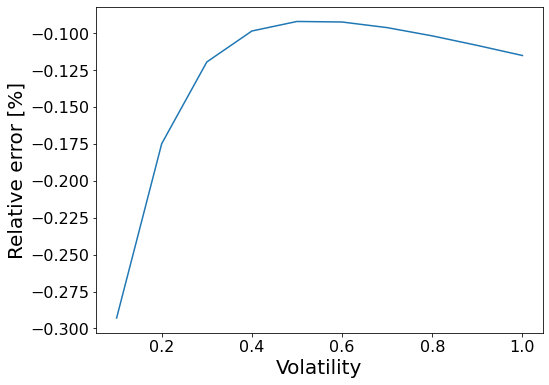

In [7]:
sigmas = np.arange(0.1, 1.1, .1)
binomial_tree_values = []
black_scholes_values = []
relative_errors = []

for sigma in sigmas:
    binomial_tree = BinomialTree(S=100, vol=sigma, T=1, N=50, r=0.06, K=99, pricing_type="eu")

    binomial_tree.build_stock_tree()
    binomial_tree.build_option_tree()

    binomial_tree_option = binomial_tree.option_tree[0][0]
    black_scholes_option, black_scholes_delta = binomial_tree.black_scholes_formula()
    binomial_tree_delta = binomial_tree.calc_delta()

    relative_error = (binomial_tree_delta - black_scholes_delta) / black_scholes_delta * 100

    binomial_tree_values.append(binomial_tree_delta)
    black_scholes_values.append(black_scholes_delta)
    relative_errors.append(relative_error)

plt.plot(sigmas, binomial_tree_values, label="binomial tree")
plt.plot(sigmas, black_scholes_values, label="black scholes")
plt.xlabel("Volatility")
plt.ylabel("$\Delta$")
plt.legend()
plt.show()

plt.plot(sigmas, relative_errors)
plt.xlabel("Volatility")
plt.ylabel("Relative error [%]")
plt.show()

### Excercise 2e
Comparing american put and call options

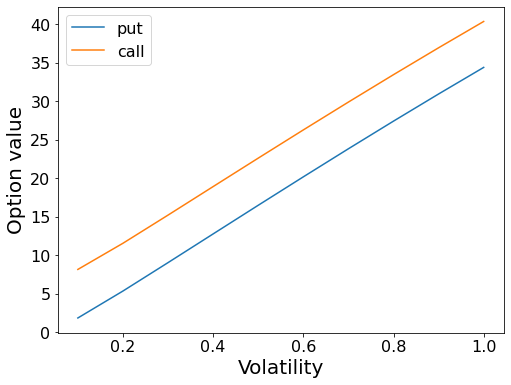

In [8]:
sigmas = np.arange(0.1, 1.1, .1)

for option_type in ["put", "call"]:
    
    option_values = []
    for sigma in sigmas:

        binomial_tree = BinomialTree(S=100, vol=sigma, T=1, N=50, r=0.06, K=99, 
                    pricing_type="american", option_type=option_type)

        binomial_tree.build_stock_tree()
        binomial_tree.build_option_tree()

        binomial_tree_option = binomial_tree.option_tree[0][0]

        option_values.append(binomial_tree_option)

    plt.plot(sigmas, option_values, label=option_type)

plt.xlabel("Volatility")
plt.ylabel("Option value")
plt.legend()
plt.show()